# Principal Component Analysis (PCA)

### Introduction 

**Principal Component Analysis** is a technique used in ML to reduce dimensions.

Lets aay u are working on building a ML model to predict property prices
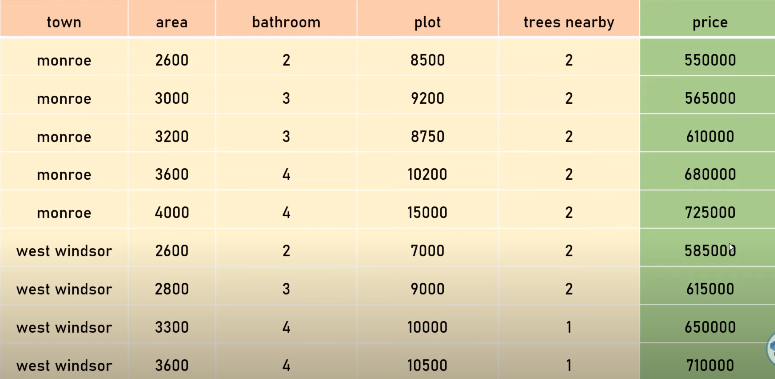
Above, all the columns in the left hand side are the features or the attributes of the property that decide the price, so the column in green is the target variable.

You prolly already know that the price of the home is mainly dependent on the Area, which town it is in, plot, etc, it also depends on how many bathrooms u have in a property but not as much, for example 2600 sqrfoot home with 2 bathroom vs 3000 sqrfoot home with 3 bathroom, the price wont be that different so basically features like Area and plot plays a more important role than the other features, bathroom also plays a role but not as much and for trees column, we know it doesnt really matter whether u have 2 trees or 3 trees nearby ur home so this feature prolly doesnt even impact the target that much.

In real life, when u solve an ML problem, u will have many columns/features, prolly 100 or 1000 of them and u will need to do something to identify the features which are the most important

### Digit dataset

Lets say u are working on hand written digit classification and u are trying to classifiy it from 0 to 9
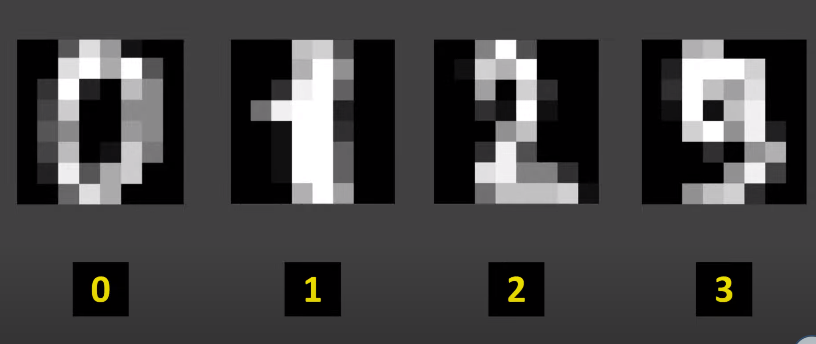
Below, this image is represented as pixels, lets say this is a grid of 8x8 amd every number present the color, 
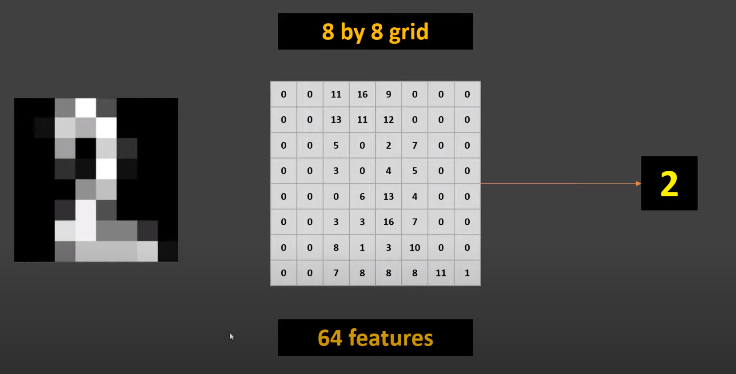
so 0 means black, 16 means highest and since its an 8x8 grid there are total 64 pixels that help to determine what number it is, so this 64 pixels are called features.

Now if u think about some of the pixels in these images, u will find that those pixels dont play any role at all in figuring what digit is it, for example below two highlitghted pixels
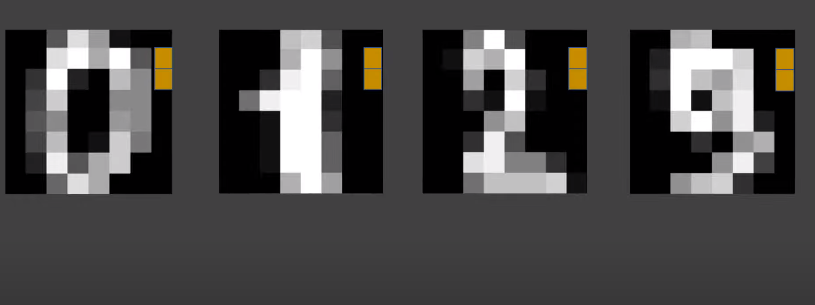
no matter what number/digit is it, these pixels are always black, So we can say that these pixels are not important feature, and what if we get rid of these feature? we get two benefits out of that 
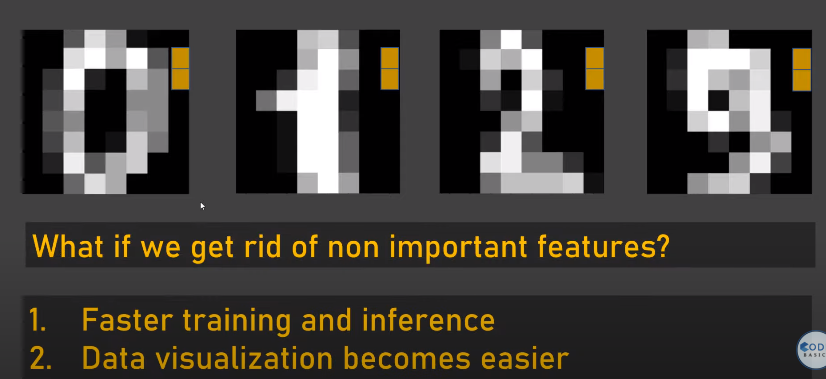
1. The training will be faster, we know ML model takes alot of time to train due to lots of resources, so it can become a lil light weight and ur inference can also be faster
2. Data visualization becomes easier, lets say u have 100 features and somehow u reduce those 100 features into only 2 or 3 features then as a human u can plot it in a 2D or 3D grap u can visualize it.

### PCA

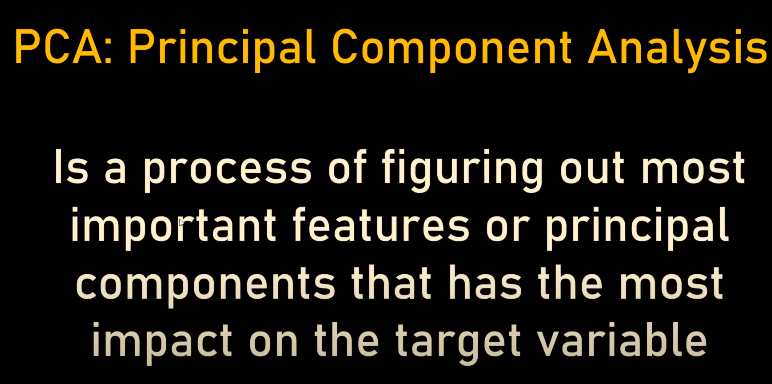
**Principal Component Analysis (PCA)** is a of figuring out the most important feature or the principal component that has the most impact on the target vairable, **PCA** will create, infact the new features called **Principal Component**, like PC1, PC2, PC3, etc

# Iris flower dataset

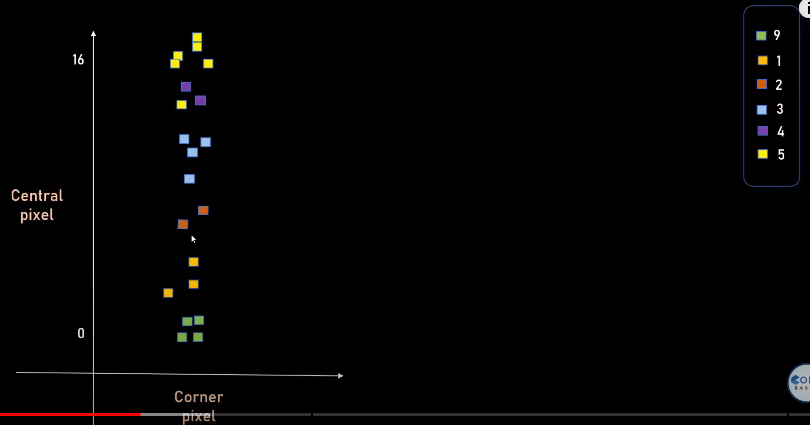
So again going back to the digit example, lets ay we have 64 features, out of that we are plotting only two featurews, corner and central pixel, Now here, those clusters represent differnt digits, u immediately notice that the corner pixel is not playing aN important role, maximum variation is on the **y-axis** which is the central pixels, so if i ask u toi reduce this 2 dimensional into 1 dimension, u can easily do so by getting rid of corner pixels, so the graph below on the right hand side, it is 1 dimension
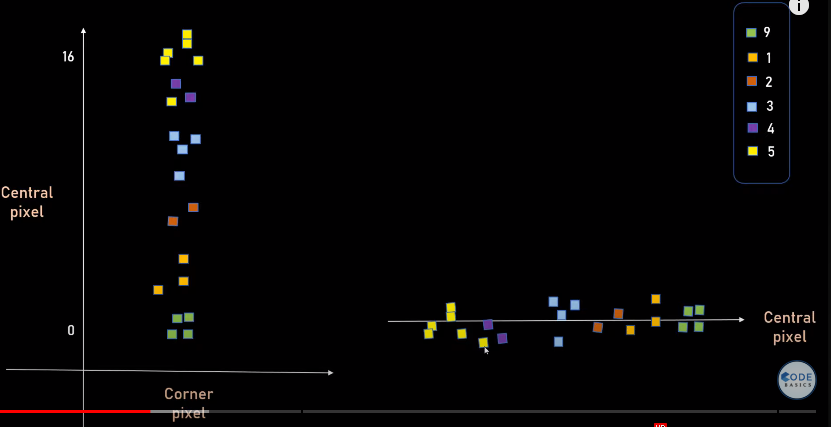


Now, lets look at the iris flower dataset where sepal width and height determines what kind of flower it is, if u have a scatter plot like below
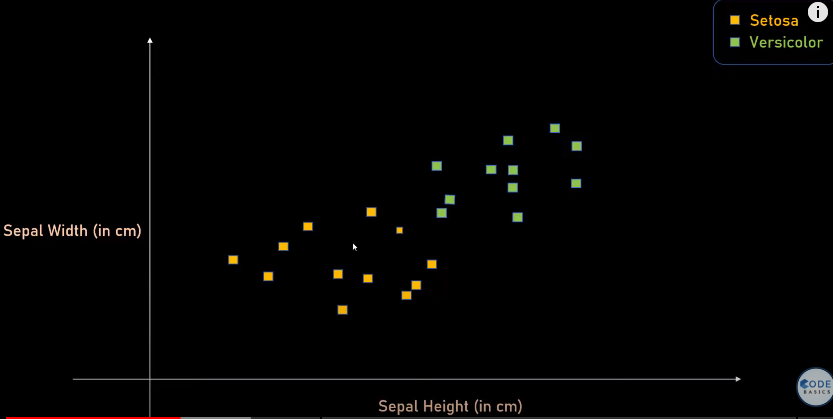
u can draw a line which cover the maximum variance or the maximum information in terms of featues
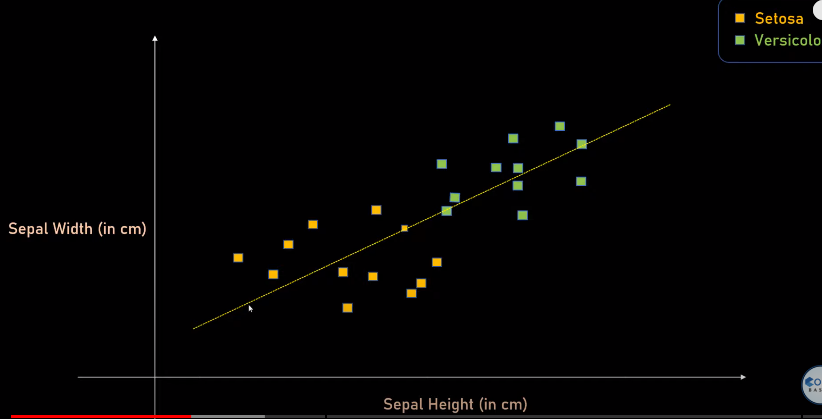
and u can draw a Perpendicular line which covers the second most variance and these are called **Principal Component**
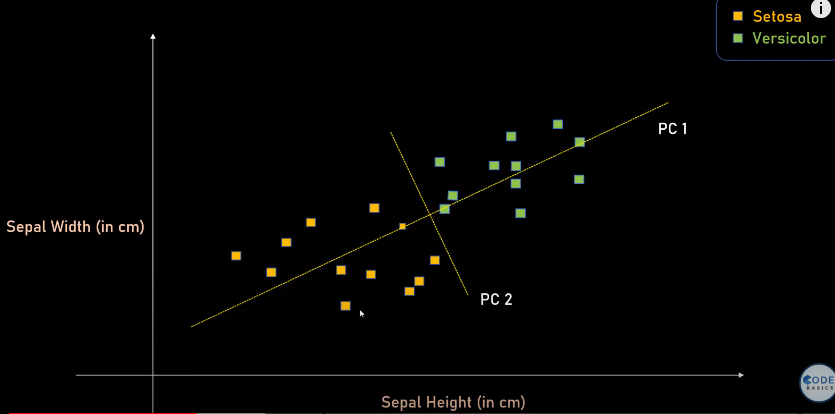
So above PC1 covers most of the variance and PC2 covers the second most variance.

So when u apply **PCA**, u can get a chart like this 
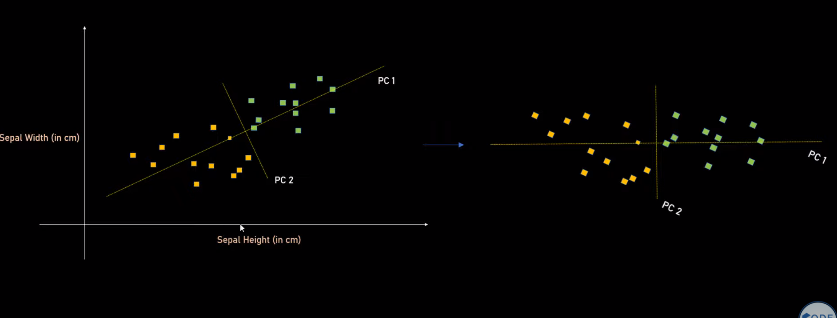
These graph is only for 2 dimension but if u have like 100 dimension, and if u apply **PCA** u can fugure out lets say 10 most important **Principal Components**, so for 100 features, u can actually create 100 **Principal Components** in the descending order of their impact on the target variable

### Digit dataset

So for digits, if wehave to load this in a DataFrame, it will look like below
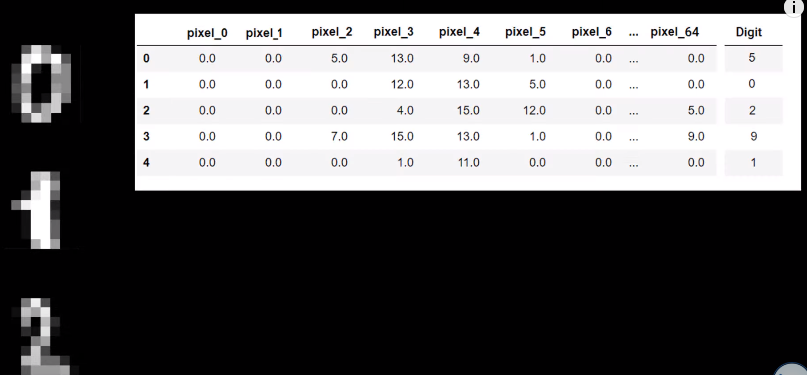
We can see pixel_0 and pixel_1 has all values is 0 and they are not really that important, so when you use SKLearn library and call **PCA** method where u say okay n component is 6, u are bassically asking **PCA** to extract the sixth most important component and that will look something like below
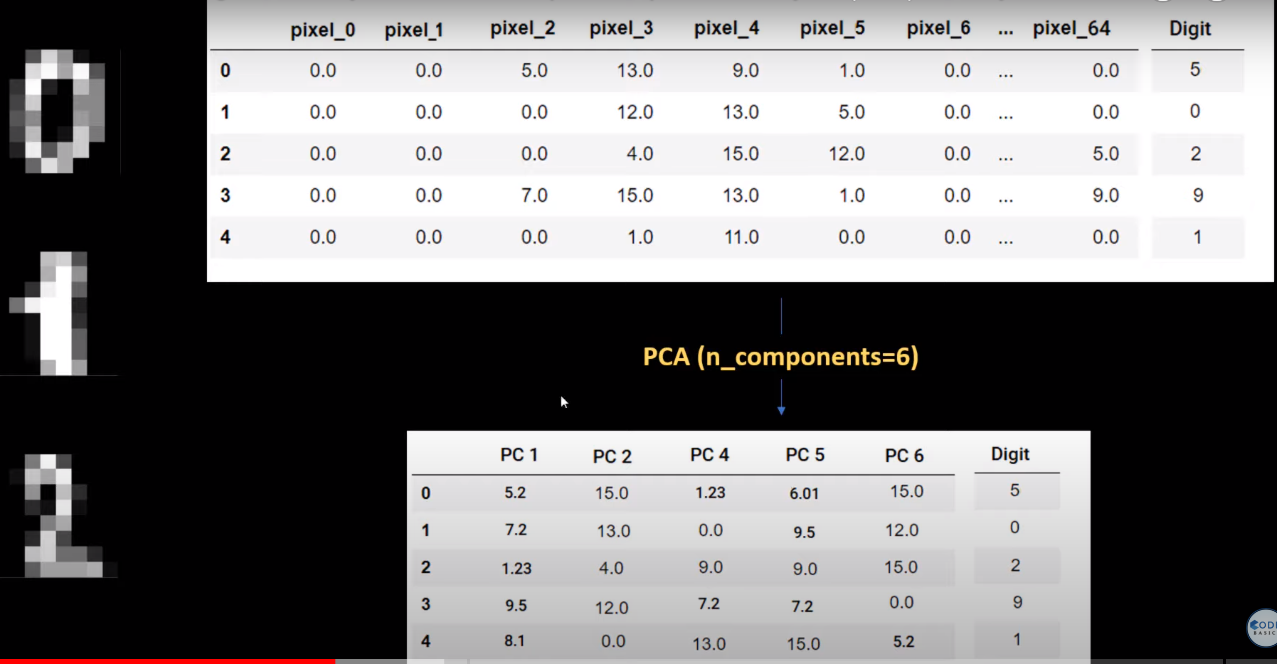
What this is doing is, Calculating new features and these feeatures are such that PC1 covers the most variance in terms of features, in terms of information extraction from ur dataset, PC2 is the second most highest component, Above we gave 6 but u can give it anything like 2,3,4 or 5 and do trial and error, You can also give a different parameter to this method which will be like 0.95 which basically means get me 95% of information in terms of featues

### Keep in mind
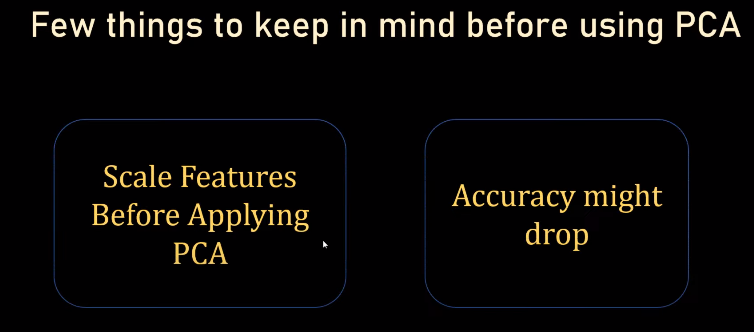
Few things to keep in mind before using **PCA** is u need to scale the features cuz ifu dont scale it, its not going to work, for example in below chart
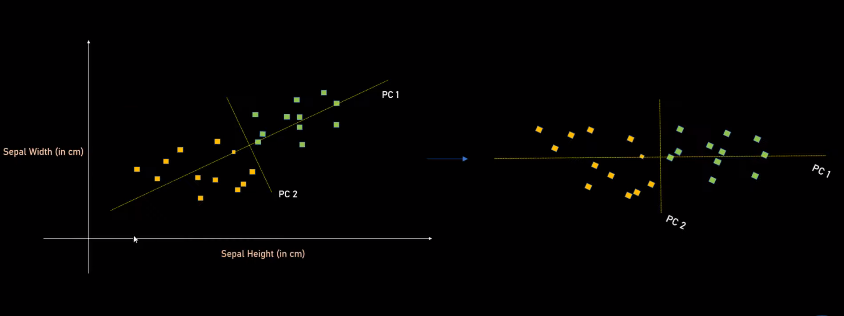
and if the **X-axis** is like in million and the **y-axis** is in just hundreds then the graph mighht become skewed and the **PCA** will not work.

Another thing is, Accuracy might drop, so its like a trade-off, when u are tryring to reduce, lets say u have 100 featues and all 100 features are important and contribute to the target variable, and if u reduce 100 to like 5 then u are going to lose alot of informations.

So to summerize, **PCA** is called a dimensionality reduction technique as it can help us reduce dimensions

# Coding Part

In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
dataset = load_digits()

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### Checking shape of data

In [5]:
dataset.data.shape

(1797, 64)

In [6]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

As u can see above, when we check the first data, its a flat 1 Dimensional array of 64 pixels and if u want to visualize this data in matplotlib, you need to convert it into a 2 Dimensional array as below, when u do 8x8 it just converts the 1D array to 2D array

In [7]:
dataset.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Now, u can import matplotlib and visualize it 

In [8]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

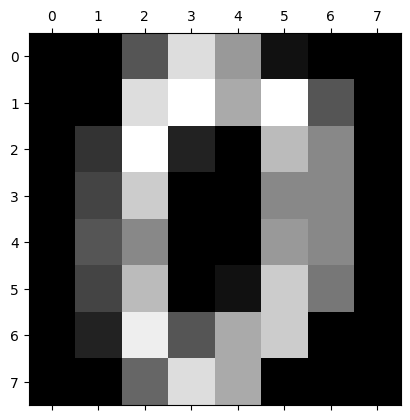

In [10]:
plt.gray()
plt.matshow(dataset.data[0].reshape(8, 8))

In [11]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

### Check only unique target variable using Numpy

In [13]:
import numpy as np
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Creating DataFrame

In [15]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [16]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


For each of the columns, if u look at the min and max it will be between 0 and 16 so 0 is our minimum value and 16 is the highest

### X and y Splitting

In [17]:
X = df
y = dataset.target

In [18]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [19]:
y

array([0, 1, 2, ..., 8, 9, 8])

# Scaling feature using StandardScaler

Now, we will scale our features before building our ML model so we will just use **StandardSCaler** from sklearn

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

When u call fit_transform, it will just scale that X andu can store it into X_scaled

In [22]:
X_scaled = scaler.fit_transform(X)

Now, if u print X_scaled, u can see that the value are now scaled, we used **StandardSCaler** but u can also use **MinMaxScaler**

In [23]:
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

### Train Test Splitting

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

### Model

For this we will use Logistic regression model but u can use any

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

We got a pretty high score which is interesting but now lets do **PCA**

## PCA

In [29]:
from sklearn.decomposition import PCA

You can supply 2 types arguments, u can either say How many components u want so u can give it 2, 5 and trial and error OR u can supply percentage like 0.95 which basically mean retain 95% of useful features and then create new dimensions, So u are not explicitily saying that I want only 2 Dimensions as an output but u are saying give me 95% of information/variation and whatever features u come up with im happy with that

In [30]:
pca = PCA(0.95)

In [31]:
X_pca = pca.fit_transform(X)

PCA is quite simple, you supply ur Dataframe then u get a new Dataframe with new features, new principal components and now when u check the shape u can see now we only have 29 columns instead of 64 so it prolly got rid of unncessary columns such as the pixel_0 and pixel_1 we saw above since it has only 0 values so those are not needed

In [33]:
X_pca.shape

(1797, 29)

#### Note : By the way, its not like it will pick 29 columns out, it will actually Calculate new columns

In [35]:
X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

If u run the below method, it will tell u like ur first column is capturing 14% or variation or 14% useful information from my dataset and 2nd component is capturing 13%, etc

In [36]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

You can run the below method to know how many components you got, which is basically ur columns which is 29

In [38]:
pca.n_components_

29

So, as u can see PCA helped us reduce our columns from 64 to 29, All these 29 columns are Computed columns, they are the new feature, good news is, u can now use this new dataframe to train your model

So we will again to Train Test split but this time we will supply X_pca

### Train Test split on PCA data

In [40]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

### Model

In [42]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

## Supplying num of components explicitly
Now lets try to explicitely pass n_components instead of percentage

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

As u can see above, only 2 columns

In [44]:
X_pca

array([[ -1.25946742,  21.27488241],
       [  7.957612  , -20.76869509],
       [  6.99192391,  -9.95598479],
       ...,
       [ 10.8012848 ,  -6.96024911],
       [ -4.87209946,  12.42397009],
       [ -0.34438972,   6.36554575]])

Now, when u run below method again u can see u are only Capturing 14% and 13% information which is pretty low so naturally when u do this, the accuracy is going to be low

In [47]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

Now if we run the same code as above but with the new pca u can see our score will be pretty low

In [48]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

So u can see, ur accuracy is only 60% but now ur Computation is very fast since u only have 2 important columns, so it depends on you